<a href="https://colab.research.google.com/github/Dgatsi/NPHA/blob/main/npha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*Prediction on* **National Poll on Healthy Aging (NPHA)** *using Diff. ML Algorithms*-
* Log Reg
* KNN
* SVM
* Decision Tree



In [162]:
#IMPORTING LIBRARIES REQUIRED
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [163]:

data = pd.read_csv('/content/NPHA-doctor-visits.csv')

#to find top 5 rows and information in the given dataset respectively
print(data.head())
print(data.info())

   Number of Doctors Visited  Age  Phyiscal Health  Mental Health  \
0                          3    2                4              3   
1                          2    2                4              2   
2                          3    2                3              2   
3                          1    2                3              2   
4                          3    2                3              3   

   Dental Health  Employment  Stress Keeps Patient from Sleeping  \
0              3           3                                   0   
1              3           3                                   1   
2              3           3                                   0   
3              3           3                                   0   
4              3           3                                   1   

   Medication Keeps Patient from Sleeping  Pain Keeps Patient from Sleeping  \
0                                       0                                 0   
1                 

In [164]:
# Checking for missing values
print(data.isnull().sum())

# In case, If there are missing values,replace IT WITH MEDIAN
data.fillna(data.mean(), inplace=True)

Number of Doctors Visited                     0
Age                                           0
Phyiscal Health                               0
Mental Health                                 0
Dental Health                                 0
Employment                                    0
Stress Keeps Patient from Sleeping            0
Medication Keeps Patient from Sleeping        0
Pain Keeps Patient from Sleeping              0
Bathroom Needs Keeps Patient from Sleeping    0
Uknown Keeps Patient from Sleeping            0
Trouble Sleeping                              0
Prescription Sleep Medication                 0
Race                                          0
Gender                                        0
dtype: int64


1. Prediction using Diff. ML Algorithm using 'Trouble Sleeping' as target variable


In [165]:
# Selecting the target variable
target_variable = 'Trouble Sleeping'

# Use all columns except the target variable as features
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=246)

In [166]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [167]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
print("FOR Logistic Regression:")
print("The Accuracy is:", accuracy_score(y_test, logistic_predictions))
print("Classification Report:\n", classification_report(y_test, logistic_predictions))


FOR Logistic Regression:
The Accuracy is: 0.6223776223776224
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.25      0.38        12
           2       0.59      0.44      0.50        59
           3       0.63      0.83      0.72        72

    accuracy                           0.62       143
   macro avg       0.66      0.51      0.53       143
weighted avg       0.62      0.62      0.60       143



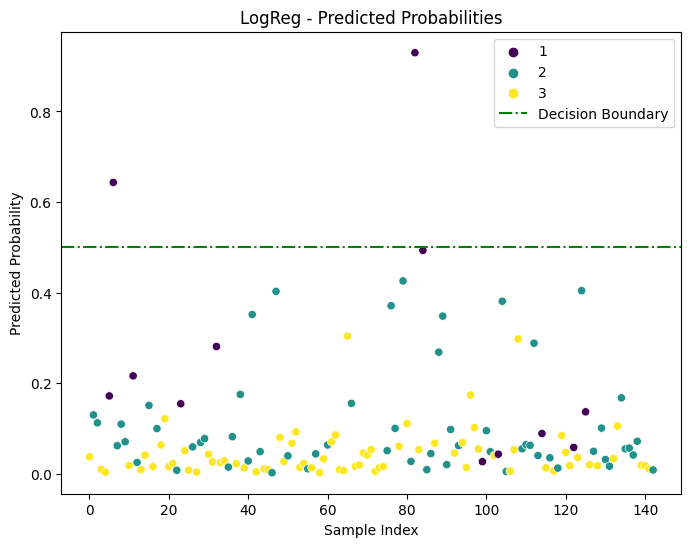

In [168]:
probabilities = logistic_model.predict_proba(X_test)[:, 1]

# Plotting the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(len(y_test)), y=probabilities, hue=y_test, palette='viridis', marker='o')
plt.axhline(y=0.5, color='green', linestyle='-.', label='Decision Boundary')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('LogReg - Predicted Probabilities')
plt.legend()
plt.show()

In [169]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))


K-Nearest Neighbors:
Accuracy: 0.5524475524475524
Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.25      0.35        12
           2       0.48      0.49      0.49        59
           3       0.60      0.65      0.63        72

    accuracy                           0.55       143
   macro avg       0.56      0.46      0.49       143
weighted avg       0.55      0.55      0.55       143



In [170]:
# SUPPORT VECTOR MACHINE
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))


Support Vector Machine:
Accuracy: 0.5874125874125874
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.17      0.29        12
           2       0.52      0.39      0.45        59
           3       0.61      0.82      0.70        72

    accuracy                           0.59       143
   macro avg       0.71      0.46      0.48       143
weighted avg       0.61      0.59      0.56       143



In [171]:
# DECISION TREE
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("\nDecision Tree:")
print("THE Accuracy IS:", accuracy_score(y_test, dt_predictions))
print("The Classification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree:
THE Accuracy IS: 0.45454545454545453
The Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       0.15      0.17      0.16        12
           2       0.43      0.42      0.43        59
           3       0.54      0.53      0.54        72

    accuracy                           0.45       143
   macro avg       0.28      0.28      0.28       143
weighted avg       0.46      0.45      0.46       143



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Prediction using Diff. ML Algorithm using 'Mental Health' as target variable

In [172]:
# Specify the target variable
target_variable = 'Mental Health'

# Use all columns except the target variable as features
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=136)


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Classification Report:\n", classification_report(y_test, logistic_predictions))


Logistic Regression:
Accuracy: 0.43356643356643354
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           1       0.48      0.44      0.46        34
           2       0.44      0.62      0.51        58
           3       0.38      0.26      0.31        39
           4       0.25      0.09      0.13        11

    accuracy                           0.43       143
   macro avg       0.31      0.28      0.28       143
weighted avg       0.42      0.43      0.41       143



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [174]:

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))




K-Nearest Neighbors:
Accuracy: 0.3776223776223776
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           1       0.28      0.44      0.34        34
           2       0.41      0.48      0.44        58
           3       0.55      0.28      0.37        39
           4       0.00      0.00      0.00        11

    accuracy                           0.38       143
   macro avg       0.25      0.24      0.23       143
weighted avg       0.38      0.38      0.36       143



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))



Support Vector Machine:
Accuracy: 0.4405594405594406
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           1       0.41      0.38      0.39        34
           2       0.44      0.66      0.53        58
           3       0.48      0.31      0.38        39
           4       0.00      0.00      0.00        11

    accuracy                           0.44       143
   macro avg       0.27      0.27      0.26       143
weighted avg       0.41      0.44      0.41       143



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree:
Accuracy: 0.3356643356643357
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           1       0.33      0.38      0.35        34
           2       0.36      0.34      0.35        58
           3       0.33      0.33      0.33        39
           4       0.25      0.18      0.21        11

    accuracy                           0.34       143
   macro avg       0.25      0.25      0.25       143
weighted avg       0.33      0.34      0.33       143



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
